<a href="https://colab.research.google.com/github/komorimasashi/Hokudai2023Resources/blob/main/ThurstonePairedComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# サーストンの一対比較法
ThurstonePairedComparison <- function(x) {
  n_items <- ncol(x)
  stopifnot(n_items == nrow(x))

  labels <- if(is.null(dimnames(x))) {
    LETTERS[1:n_items]
  } else if(is.null(colnames(x))) {
    rownames(x)
  } else {
    colnames(x)
  }

  total_comparisons <- x + t(x)
  diag(total_comparisons) <- 1
  z_scores <- qnorm(x/total_comparisons)
  diag(z_scores) <- NA
  item_scores <- rowMeans(z_scores, na.rm=TRUE)
  names(item_scores) <- labels

  return(structure(list(score=item_scores, sorted.score=sort(item_scores)), class="ThurstonePairedComparison"))
}

# 結果の表示
print.ThurstonePairedComparison <- function(obj, digits=5) {
  cat("\nスコア\n\n")
  print(round(obj$score, digits=digits))
  cat("\nソートされたスコア\n\n")
  print(round(obj$sorted.score, digits=digits))
}

# 結果のプロット
plot.ThurstonePairedComparison <- function(obj, xlab="Score", main="Thurstone's Paired Comparison", file="") {
  if (file != "") {
    pdf(file, width=540/72, height=160/72, onefile=FALSE)
  }

  scores <- obj$score
  plot(scores, rep(0, length(scores)), pch=19, xlab=xlab, main=main, xaxt="n", xlim=range(pretty(scores)), ylab="", yaxt="n", ylim=c(0,0.2), bty="n", xpd=TRUE)
  text(scores, 0.0, names(scores), pos=3)
  axis(1, pos=0)

  if (file != "") {
    dev.off()
  }
}



   A  B  C  D  E  F  G  H
A  0 72 73 70 73 73 69 60
B  2  0 32  1 18  6  2  1
C  1 42  0  1 19 17  2  1
D  4 73 73  0 59 63 44 22
E  1 56 55 15  0 24  9  7
F  1 68 57 11 50  0 15 10
G  5 72 72 30 65 59  0 18
H 14 73 73 52 67 64 56  0

スコア

       A        B        C        D        E        F        G        H 
 1.79165 -1.50557 -1.39753  0.62813 -0.66134 -0.37066  0.48890  1.02641 

ソートされたスコア

       B        C        E        F        G        D        H        A 
-1.50557 -1.39753 -0.66134 -0.37066  0.48890  0.62813  1.02641  1.79165 


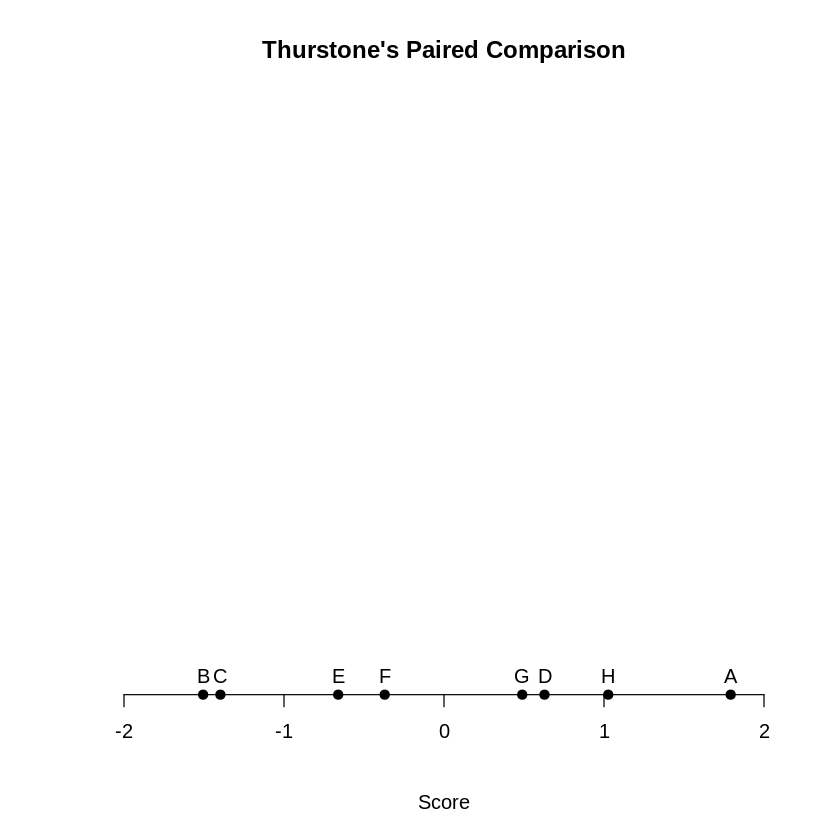

In [4]:
# 使用例
comparison_matrix <- matrix(c(
  0, 72, 73, 70, 73, 73, 69, 60,
  2, 0, 32, 1, 18, 6, 2, 1,
  1, 42, 0, 1, 19, 17, 2, 1,
  4, 73, 73, 0, 59, 63, 44, 22,
  1, 56, 55, 15, 0, 24, 9, 7,
  1, 68, 57, 11, 50, 0, 15, 10,
  5, 72, 72, 30, 65, 59, 0, 18,
  14, 73, 73, 52, 67, 64, 56, 0), byrow=TRUE, ncol=8)

rownames(comparison_matrix) <- colnames(comparison_matrix) <- LETTERS[1:8]
print(comparison_matrix)

result <- ThurstonePairedComparison(comparison_matrix)
print(result)
plot(result)